# Visualizing a tif image in Paraview

PoreSpy visualization class includes varieties of visualization methods for quick plotting, mesh, 2D visualization, etc. However, for a detailed 3D visualization [Paraview](https://www.paraview.org/) can be used to visualize the images generated by PoreSpy. In this tutorial we will generate a `.tif` image using PoreSpy and visualize the image in Paraview. Note that Paraview includes varieties of filters such as slice, threshold, contours, etc for different visualization purposes. For more details visit [Paraview](https://www.paraview.org/).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
import imageio

Let's first generate a test image in PoreSpy using the ``blobs`` generator.

0it [00:00, ?it/s]

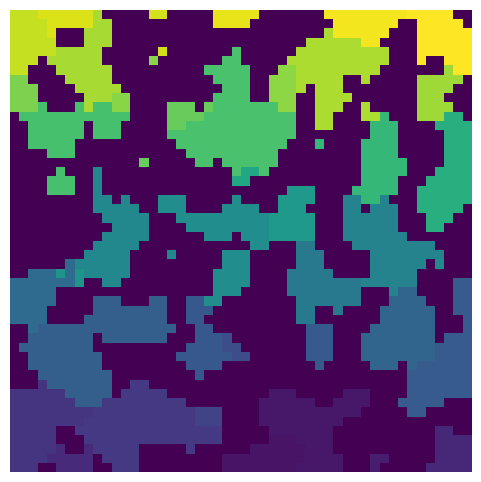

In [2]:
np.random.seed(10)
im = ps.generators.blobs(shape=[50,50,50])
snow = ps.filters.snow_partitioning(im)
regions = snow.regions
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(regions[:,:,20], origin='lower', interpolation='none')
ax.axis(False);

 We can then save the ragions as a `.tif` format to be imported in Paraview.

In [3]:
imageio.volsave("regions.tif", np.array(regions.astype("uint8")))

Now let's visualize the image in Paraview. First open the image using `TIFF Series Reader` in Paraview:

![image](https://user-images.githubusercontent.com/43128873/160916195-6225f31d-5e5e-4abb-921b-ff977a32192e.png)

Now regions.tif in the Pipeline Browser represents the reader of the image data. To the left of this object there is an `eye` toggle icon. This icon indicates whether or not the object is shown in the view window on the right. You can control showing or not showing the image by left-clicking on the icon. Then click on Apply to apply the change:

![image](https://user-images.githubusercontent.com/43128873/160916284-b05ad7c0-ed10-4a1d-9784-e0570fc52f90.png)

Now the object default representation in the view window is outline with solid coloring. Select `surface` representation and `Tiff scalars` for coloring. Then click on Apply. The view window then shows a 3D image colored by the values of each voxel (here region labels):  

![image](https://user-images.githubusercontent.com/43128873/160916368-a043f3cf-6940-4ce2-84d6-2fd00d04a0ce.png)

You can change the color map by clicking on the Choose Preset and selecting a colormap:

![image](https://user-images.githubusercontent.com/43128873/160916497-85a16cce-1816-428c-b673-0d6fc4b2a47b.png)

Now the regions are colored by the new selected colormap:

![image](https://user-images.githubusercontent.com/43128873/160916625-961f6d23-f31f-43c1-bd1a-4f9a0bf0272d.png)